**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

**IRIS**

In [2]:
#%%pycodestyle

import numpy as np
from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        scaler =  StandardScaler().fit(X)
        self.X = scaler.transform(X)
        self.y = np.array(y)
        self.classes = np.unique(y)
        self.X2 = (self.X ** 2).sum(axis=1)
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.X)

    def predict(self, X):
        scaler =  StandardScaler().fit(X)
        X = scaler.transform(X)
        if self.algorithm == 'brute':
            return self.predictBrute(X)
        elif self.algorithm == 'kd_tree':
            return self.predictTree(X)

    def predictBrute(self, X):
        X2 = (X**2).sum(axis=1)
        dist = np.sqrt(X2.reshape(-1, 1) + self.X2 - 2*np.dot(X, self.X.T))
        predict = self.y[np.argsort(dist)[:, :self.n_neighbors]]
        result = np.empty(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            res_temp = np.zeros(len(self.classes), dtype=int)
            for j in range(predict.shape[1]):
                res_temp[int(round(predict[i,j], 0))] += 1
            result[i] = res_temp.argmax()
        return result

    def predictTree(self, X):
        res_temp = np.zeros((X.shape[0], len(self.classes)), dtype=float)
        result = np.empty(X.shape[0], dtype=int)
        dist, ind = self.tree.query(X, k=self.n_neighbors)
        predict = self.y[ind]
        for i in range(X.shape[0]):
            for j in range(self.n_neighbors):
                res_temp[i][int(round(predict[i, j], 0))] += 1
            result[i] = np.argmax(res_temp[i])
        return result

    def predict_proba(self, X):
        scaler =  StandardScaler().fit(X)
        X = scaler.transform(X)
        if self.algorithm == 'brute':
            return self.predictBrute_proba(X)
        elif self.algorithm == 'kd_tree':
            return self.predictTree_proba(X)

    def predictBrute_proba(self, X):
        X2 = (X**2).sum(axis=1)
        dist = X2.reshape(-1, 1) + self.X2 - 2*np.dot(X, self.X.T)
        predict = self.y[np.argsort(dist)[:, :self.n_neighbors]]
        result = np.zeros((X.shape[0], len(self.classes)), dtype=float)
        for i in range(X.shape[0]):
            for j in range(self.n_neighbors):
                result[i][int(round(predict[i, j], 0))] += 1
            result[i] /= self.n_neighbors
        return result

    def predictTree_proba(self, X):
        dist, ind = self.tree.query(X, k=self.n_neighbors)
        predict = self.y[ind]
        result = np.zeros((X.shape[0], len(self.classes)), dtype=float)
        for i in range(X.shape[0]):
            for j in range(self.n_neighbors):
                result[i][int(round(predict[i, j], 0))] += 1
            result[i] /= self.n_neighbors
        return result

    def score(self, X, y):
        y_train = self.predict(X)
        result = 0
        for i in range(len(y_train)):
            if y_train[i] == y[i]:
                result += 1
        return result / len(y)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

Wall time: 1e+03 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

Wall time: 1e+03 µs


In [8]:
%time clf.predict(X_test)

Wall time: 1 ms


array([2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2])

In [9]:
%time my_clf.predict(X_test)

Wall time: 15 ms


array([2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2])

In [10]:
%time clf.predict_proba(X_test)

Wall time: 1e+03 µs


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [11]:
%time my_clf.predict_proba(X_test)

Wall time: 0 ns


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

Num of neighbours with best score is 9


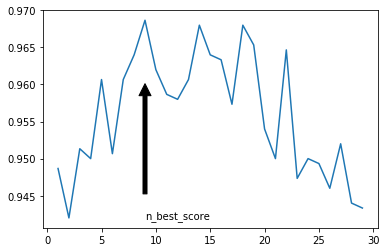

In [14]:
#%%pycodestyle

n_neighbors_test = range(1, 30)
my_clf_predict_test = []
iterations = 100
for i in n_neighbors_test:
    result = 0
    for j in range(iterations):
        X_train, X_test, \
        y_train, y_test = train_test_split(iris.data, iris.target,
                                           test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        result += my_clf.score(X_test, y_test)
    my_clf_predict_test.append(result / iterations)

n_best_score = np.argmax(my_clf_predict_test) + 1
print("Num of neighbours with best score is {}".format(n_best_score))

plt.plot(n_neighbors_test, my_clf_predict_test)
plt.annotate('n_best_score', xy=(n_best_score,
                                 my_clf_predict_test[n_best_score]),
             xytext=(n_best_score, np.amin(my_clf_predict_test)),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()


**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

Wall time: 39.2 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Wall time: 1.43 s


In [20]:
%time clf.predict(X_test)

Wall time: 54.1 s


array([4., 9., 3., 7., 2., 1., 4., 1., 0., 7., 2., 6., 5., 3., 3., 7., 9.,
       1., 6., 2., 8., 0., 9., 0., 1., 7., 0., 1., 7., 3., 3., 2., 1., 8.,
       9., 1., 1., 5., 1., 9., 9., 1., 0., 2., 1., 0., 0., 8., 5., 3., 8.,
       1., 4., 1., 5., 6., 9., 8., 8., 2., 2., 0., 4., 3., 0., 0., 6., 2.,
       9., 1., 3., 7., 1., 3., 0., 7., 5., 3., 7., 0., 5., 6., 4., 5., 7.,
       7., 0., 3., 7., 7., 7., 0., 7., 8., 7., 3., 4., 9., 5., 1., 9., 2.,
       5., 3., 4., 0., 1., 9., 0., 5., 4., 8., 2., 6., 8., 3., 5., 7., 6.,
       2., 1., 6., 1., 8., 5., 7., 4., 7., 8., 3., 3., 9., 9., 3., 1., 6.,
       3., 2., 8., 5., 9., 0., 4., 4., 4., 8., 1., 6., 9., 1., 6., 1., 7.,
       5., 9., 7., 5., 7., 8., 1., 3., 7., 8., 3., 9., 9., 5., 7., 0., 9.,
       1., 6., 2., 9., 5., 1., 8., 8., 6., 1., 3., 5., 6., 4., 3., 5., 6.,
       6., 0., 1., 7., 3., 3., 9., 1., 8., 2., 2., 5., 1., 7., 6., 9., 9.,
       5., 9., 9., 6., 4., 4., 7., 5., 7., 3., 0., 1., 1., 1., 0., 1., 5.,
       6., 0., 2., 1., 5.

In [21]:
%time my_clf.predict(X_test)

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Wall time: 5.22 s


array([4, 9, 3, 7, 2, 1, 4, 1, 0, 7, 2, 6, 5, 3, 3, 7, 9, 1, 6, 2, 8, 0,
       9, 0, 1, 7, 0, 1, 7, 3, 3, 2, 1, 0, 9, 1, 1, 5, 1, 9, 9, 1, 0, 2,
       1, 0, 0, 8, 5, 3, 8, 1, 4, 1, 3, 6, 9, 8, 8, 2, 0, 0, 4, 2, 0, 0,
       6, 2, 9, 1, 3, 7, 1, 3, 0, 7, 5, 2, 7, 0, 5, 6, 4, 5, 7, 7, 0, 3,
       7, 7, 7, 0, 7, 8, 7, 3, 4, 4, 5, 1, 9, 2, 5, 3, 9, 0, 1, 9, 0, 5,
       4, 8, 2, 2, 8, 3, 5, 7, 6, 2, 1, 6, 1, 8, 5, 7, 4, 7, 8, 3, 3, 9,
       9, 3, 1, 6, 3, 2, 8, 5, 9, 0, 4, 4, 4, 8, 1, 6, 9, 1, 6, 1, 7, 5,
       9, 7, 5, 7, 8, 1, 3, 9, 8, 3, 9, 9, 5, 7, 4, 7, 1, 6, 2, 9, 5, 1,
       8, 5, 6, 1, 2, 5, 6, 4, 3, 5, 6, 6, 0, 1, 7, 3, 3, 9, 1, 8, 2, 2,
       5, 1, 7, 6, 7, 9, 5, 9, 9, 6, 4, 4, 7, 5, 7, 3, 0, 1, 1, 1, 0, 1,
       5, 6, 0, 2, 1, 5, 6, 0, 7, 4, 7, 6, 3, 1, 0, 6, 0, 6, 0, 2, 2, 8,
       9, 3, 6, 3, 6, 9, 9, 9, 2, 6, 2, 6, 7, 6, 7, 0, 3, 7, 5, 6, 6, 2,
       7, 4, 0, 2, 5, 4, 0, 2, 3, 3, 8, 1, 2, 0, 6, 8, 7, 5, 1, 2, 2, 8,
       6, 7, 0, 5, 1, 5, 1, 0, 7, 2, 4, 3, 9, 2, 8,

In [22]:
%time clf.predict_proba(X_test)

Wall time: 54 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Wall time: 4.74 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9714285714285714

In [25]:
my_clf.score(X_test, y_test)

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9414285714285714

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=n_best_score, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=n_best_score, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

Wall time: 39.1 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Wall time: 41 s


In [30]:
%time clf.predict(X_test)

Wall time: 54.2 s


array([2., 6., 1., 1., 6., 6., 0., 1., 7., 5., 1., 7., 0., 4., 2., 1., 1.,
       8., 6., 4., 1., 9., 9., 3., 8., 0., 3., 3., 0., 7., 3., 8., 2., 6.,
       5., 0., 5., 7., 1., 1., 3., 5., 5., 3., 6., 6., 5., 7., 7., 9., 3.,
       9., 1., 2., 7., 6., 1., 9., 3., 1., 2., 0., 1., 5., 1., 1., 9., 6.,
       0., 2., 5., 3., 1., 9., 6., 6., 5., 7., 7., 4., 2., 7., 4., 0., 5.,
       1., 5., 7., 6., 7., 5., 6., 2., 5., 1., 2., 7., 4., 5., 8., 0., 5.,
       8., 7., 9., 1., 9., 3., 1., 5., 5., 0., 7., 1., 9., 4., 0., 1., 4.,
       0., 5., 4., 1., 3., 3., 7., 9., 2., 1., 4., 7., 3., 0., 7., 9., 4.,
       4., 9., 4., 3., 7., 9., 9., 7., 8., 3., 9., 8., 6., 4., 8., 3., 2.,
       7., 2., 8., 8., 6., 1., 3., 1., 5., 8., 0., 4., 2., 5., 3., 3., 3.,
       2., 7., 3., 3., 9., 8., 8., 9., 0., 2., 6., 8., 7., 0., 9., 2., 6.,
       0., 1., 1., 0., 0., 3., 9., 6., 2., 8., 1., 3., 4., 8., 2., 6., 2.,
       9., 7., 7., 1., 4., 8., 4., 2., 7., 1., 7., 3., 9., 0., 0., 8., 3.,
       3., 1., 1., 0., 7.

In [31]:
%time my_clf.predict(X_test)

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Wall time: 1min 3s


array([2, 6, 1, 1, 6, 6, 0, 1, 8, 5, 1, 7, 0, 4, 2, 1, 1, 5, 6, 9, 1, 9,
       9, 3, 8, 0, 3, 3, 0, 7, 3, 8, 2, 6, 5, 0, 5, 7, 1, 1, 3, 5, 5, 3,
       6, 6, 5, 7, 7, 9, 3, 9, 1, 2, 7, 6, 1, 9, 3, 1, 2, 0, 1, 5, 1, 1,
       9, 6, 0, 2, 5, 3, 1, 9, 6, 6, 5, 7, 7, 4, 2, 7, 4, 6, 5, 2, 5, 7,
       6, 7, 3, 6, 2, 5, 1, 2, 7, 4, 5, 8, 0, 5, 8, 7, 9, 1, 9, 3, 6, 5,
       5, 0, 7, 1, 9, 4, 0, 1, 4, 0, 5, 4, 1, 3, 3, 7, 2, 2, 1, 4, 7, 3,
       0, 7, 9, 4, 4, 9, 4, 3, 7, 9, 9, 7, 8, 3, 9, 8, 6, 4, 8, 3, 6, 7,
       2, 8, 8, 6, 1, 3, 1, 5, 8, 0, 4, 2, 5, 3, 3, 3, 2, 7, 3, 3, 7, 8,
       8, 9, 0, 2, 6, 8, 7, 0, 9, 2, 2, 0, 1, 1, 2, 0, 3, 4, 6, 2, 8, 1,
       3, 9, 8, 2, 6, 2, 9, 7, 7, 1, 4, 8, 4, 2, 7, 1, 7, 3, 9, 0, 0, 8,
       3, 3, 1, 1, 0, 7, 4, 2, 6, 9, 0, 2, 9, 1, 5, 2, 6, 6, 3, 3, 8, 7,
       7, 8, 5, 9, 2, 9, 4, 1, 9, 9, 3, 7, 4, 2, 9, 2, 6, 5, 0, 5, 6, 7,
       0, 6, 3, 5, 1, 5, 3, 7, 2, 7, 5, 1, 0, 1, 8, 6, 7, 8, 9, 9, 4, 8,
       1, 0, 8, 0, 2, 0, 7, 7, 3, 9, 8, 6, 6, 9, 4,

In [32]:
%time clf.predict_proba(X_test)

Wall time: 53.8 s


array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
%time my_clf.predict_proba(X_test)

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Wall time: 1min 3s


array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55555556],
       [0.        , 0.88888889, 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [34]:
clf.score(X_test, y_test)

0.9714285714285714

In [35]:
my_clf.score(X_test, y_test)

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9485714285714286

Задание 5

In [36]:
# seaborn
'''
высокоуровневый интерфейс для matplotlib
'''
# matplotlib
'''
библиотека для рисования 2D (и 3D при импорте mplot3D) графиков
'''
# train_test_split
'''
утилита sklearn для разделения данных на несколько частей (train и test)
'''
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
'''
Pipeline - утилита sklearn для пошагового преобразования данных
%load_ext - загрузка расширений IPython 
'''
# StandardScaler (from sklearn.preprocessing import StandardScaler)  
'''
стандартизация данных, изменение среднего и стандартного отклонения
по умолчанию преобразование к виду с реднее = 0, стандартное отклонение = 1
'''                                                                            
# ClassifierMixin
'''
базовый класс классификаторов scikit-learn
'''
# NeighborsBase
'''
Базовый класс для оценок ближайших соседей
'''
# KNeighborsMixin
'''
Базовый класс для поиска по k соседям
'''
# SupervisedIntegerMixin
'''
Фиттинг модели по массиву данных X и вектору значений y
'''

'\nФиттинг модели по массиву данных X и вектору значений y\n'